# exploring target variable:

In [1]:
import pandas as pd

In [2]:
raw_housing_data=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
raw_housing_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [4]:
raw_housing_data["Sale Price"].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [5]:
raw_housing_data["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

eyeballing:
    from above data we get that 21613-21609=4 missing values in dataset
    sale price has range 75k to 7.7mn
    mean value and median value are not same that mean data is not normally distrubuted.
    mean is greather than median that implies there may be outliers in high values or data skewed towards lower values

# Identifing outliers in target variable:

In [6]:
from matplotlib import pyplot as plt

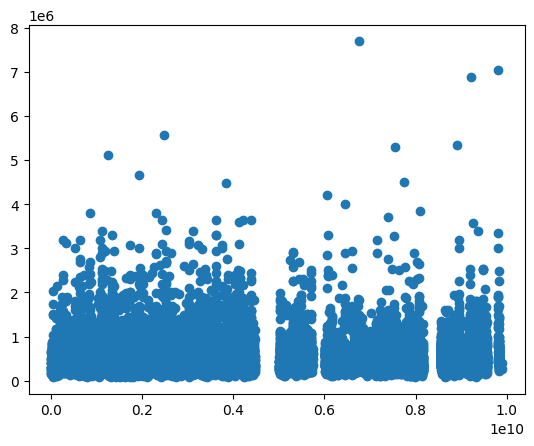

In [7]:
plt.scatter(x=raw_housing_data["ID"],y=raw_housing_data["Sale Price"])

In [8]:
#outliers are those values which distinct from other datapoints in datasets they lies either in upper or lower region

#inter quartile range(iqr) q3-q1= 645000-321950=323050
lower_limit=q1-1.5*iqr=321950-1.5(323050)=-162625
as calculated lower limit much lower so keep the lower limit as original  
lower_limit=75000
upper_limit=q3-1.5*iqr=645000-1.5(323050)=1129575 #new upper limit is considered as it is not to much high and not to low

#now any datapoint which greather upper limit and lower than lower limit is an outlier

In [9]:
#matplot lib doest have a capbility to ignore the missing values for this we use seaborn lib

In [10]:
import seaborn as sns

<Axes: xlabel='Sale Price'>

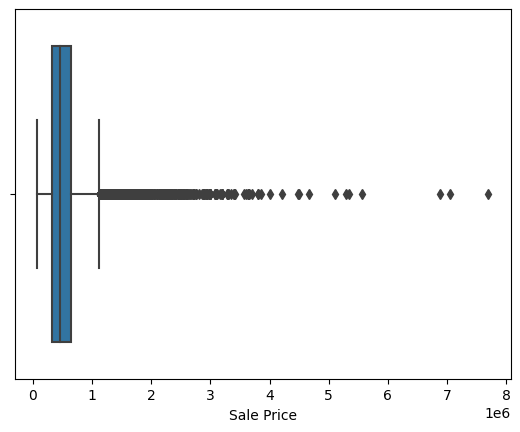

In [11]:
sns.boxplot(x=raw_housing_data["Sale Price"])

# treating outliers in target variable:: method1:: imputing:


In [12]:
#method1:imputing
#method2: deletion
#method3" data transformation
#method4: 

In [13]:
q1=raw_housing_data["Sale Price"].quantile(.25)
q3=raw_housing_data["Sale Price"].quantile(.75)

In [14]:
iqr=q3-q1
iqr

323050.0

In [15]:
upper_limit=q3+iqr*1.5
lower_limit=q1-iqr*1.5
upper_limit,lower_limit

(1129575.0, -162625.0)

In [16]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
    


In [17]:
raw_housing_data["Sale Price"]=raw_housing_data["Sale Price"].apply(limit_imputer)

In [18]:
raw_housing_data["Sale Price"].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [19]:
#still mean value is greather than the median value further treating is needed

# Idenitifing missing values

In [20]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

# treating missing values:

2 methods: 1.deletion 2.imputation , deletion is prefered over a imputation in target variable

In [21]:
#using .dropna() unction we can drop missing values in our dataset:

raw_housing_data.dropna(inplace=True,axis=0,subset=["Sale Price"])

In [22]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

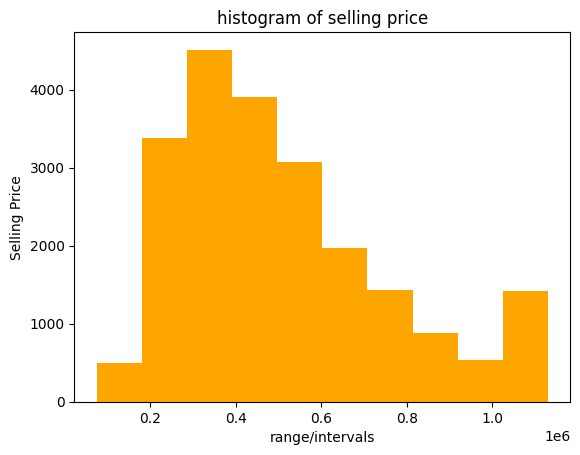

In [23]:
plt.hist(raw_housing_data["Sale Price"],bins=10,color="orange")
plt.xlabel("range/intervals")
plt.ylabel("Selling Price")
plt.title("histogram of selling price")
plt.show()


In [24]:
#from above we got to know that data is skewed towards lower house price